In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:


from itertools import product
import matplotlib.pyplot as plt
from multiprocessing import Pool
import numpy as np
import cv2

# Define the seed value for the Julia set (0.6180, -0.314)
seed_value = complex(0.248, 0.0.1)
max_iterations = 99999

# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i, int(i*255/256), int(i*255/256), int(i*255/256)
    return max_iterations,0, 0, 0

# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
    for x, y in product(range(x, x+800), range(y, y+800)):
        c = complex(x/256, y/256)
        julia_set[x+400, y+400] = escape_time(c)
    return julia_set

# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y) 
        for x in range(-400, 400, 800) for y in range(-400, 400, 800)), chunksize=1))

# Remove the alpha channel of the image
julia_set = julia_set[:,:,:3]

# Apply jet colormap to the Julia set
jet_map = cv2.applyColorMap(julia_set, cv2.COLORMAP_JET)


#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)
cv2.imwrite("julia_set_jet.png", jet_map)

#Show the original image
plt.imshow(julia_set)
plt.show()

#Show the jet colormapped image
plt.imshow(jet_map)
plt.show()
"""
COLORMAP_JET: dark blue to dark red, passing through shades of purple, blue, green, yellow, and orange.
COLORMAP_HOT: black to white, passing through shades of red, orange, and yellow.
COLORMAP_BONE: black to white, passing through shades of gray, blue, and purple.
COLORMAP_PINK: light pink to dark pink.
COLORMAP_RAINBOW: blue to red, passing through shades of purple, blue, green, yellow, orange, and red.
"""

Traceback (most recent call last):
  File /opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py:105 in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  Input In [2]
    seed_value = complex(0.248, 0.0.1)
                                   ^
SyntaxError: invalid syntax

Use %tb to get the full traceback.


/tmp/ipykernel_1993/1157425030.py:32: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)


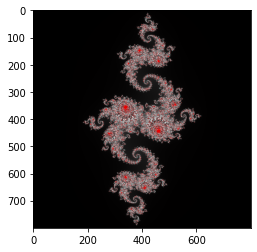

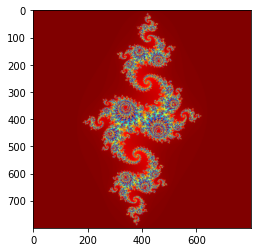

In [275]:
from itertools import product
import matplotlib.pyplot as plt
from multiprocessing import Pool
import numpy as np
import cv2

# Define the seed value for the Julia set (0.6180, -0.314)
seed_value = complex(-0.8033, 0.156)
max_iterations = 999

# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i, int(i*255/256), int(i*255/256), int(i*255/256)
    return max_iterations,0, 0, 0

# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
    for x, y in product(range(x, x+800), range(y, y+800)):
        c = complex(x/256, y/256)
        julia_set[x+400, y+400] = escape_time(c)
    return julia_set

# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y) 
        for x in range(-400, 400, 800) for y in range(-400, 400, 800)), chunksize=1))

# Remove the alpha channel of the image
julia_set = julia_set[:,:,:3]

# Apply jet colormap to the Julia set
jet_map = cv2.applyColorMap(julia_set, cv2.COLORMAP_JET)


#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)
cv2.imwrite("julia_set_jet.png", jet_map)

#Show the original image
plt.imshow(julia_set)
plt.show()

#Show the jet colormapped image
plt.imshow(jet_map)
plt.show()

In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def rand_unit() -> float:
    return random.random()

def rand_interval(a: float, b: float) -> float:
    return a + (b-a) * rand_unit()

def inverse_step(wx: float, wy: float, grid: np.ndarray, cx: float, cy: float, Nmax: int, res: int, depth: int, maxdepth: int):
    # Check for end of recursion
    if depth >= maxdepth:
        return

    # Convert to polar coordinates
    r = (wx-cx)**2 + (wy-cy)**2
    theta = math.atan2(wy-cy,wx-cx)
    
    # Find inverse using f^(-1)(w) = +/-sqrt(w - c)
    wx = math.sqrt(r)*math.cos(theta/2)
    wy = math.sqrt(r)*math.sin(theta/2)

    # Translate complex plane coordinates to grid coordinates
    xpos = int(math.floor( (res*(wx + 2))/4 ))
    ypos = int(math.floor( (res*(wy + 2))/4 ))
    xneg = int(math.floor( (res*(-wx + 2))/4 ))
    yneg = int(math.floor( (res*(-wy + 2))/4 ))
    
    if xpos >= 0 and ypos >= 0 and xpos < res and ypos < res and grid[xpos][ypos] < Nmax:
        grid[xpos][ypos] += 1
        inverse_step(wx,wy,grid,cx,cy,Nmax,res,depth+1,maxdepth)
    if xneg >= 0 and yneg >= 0 and xneg < res and yneg < res and grid[xneg][yneg] < Nmax:
        grid[xneg][yneg] += 1
        inverse_step(-wx,-wy,grid,cx,cy,Nmax,res,depth+1,maxdepth)

'''
cx and cy: These are the real and imaginary parts of the constant c in the quadratic function f(z) = z^2 + c. 
Some popular choices for c include -0.8 + 0.156i, -0.4 + 0.6i, and -0.7269 + 0.1889i
You can experiment with different values of c to see the different patterns that are generated.

Nmax: This is the maximum number of points per grid box. A value of 10 or 20 is typically a good starting point.

res: This is the resolution of the grid, which controls the size and detail of the image. 

maxdepth: This is the maximum depth of the tree search. A value of 8 or 10 is a good starting point. 
'''

def main():
    cx, cy = map(float, input("Enter c (real and imaginary parts ie: -0.8 + 0.156): ").split())
    Nmax = int(input("Enter maximum number of points per grid box: ie:10 "))
    res = int(input("Enter grid resolution: ie: 800 "))
    maxdepth = int(input("Enter maximum depth of tree search: ie:10 "))
    assert Nmax > 0
    assert res >= 10
    assert res % 2 == 0
    assert maxdepth > 0

    # The grid ranges from -2...+2 in both the x and y directions
    grid = np.zeros((res, res))

    # Randomly pick a point near the origin with which to start iterating
    wx = np.random.normal(0, 0.1618033)
    wy = np.random.normal(0, 0.1618033)

    inverse_step(wx, wy, grid, cx, cy, Nmax, res, 0, maxdepth)

    # Display the fractal image
    plt.imshow(grid, cmap='hot')
    plt.show()

    # Save the fractal image to file
    plt.imsave('fractal_image.png', grid, cmap='hot')

if __name__ == '__main__':
    main()



KeyboardInterrupt



In [ ]:


    iter = 0
    CStack = []
    root = {"label": 0, "Deriv": 1, "Z": Complex(1,0)}

    if C.real == 0 and C.imag == 0:
        root["Z"] = Complex(1, 0)

    CStack.append(root)
    img = np.zeros((int((self.Ymax-self.Ymin)/self.dy),int((self.Xmax-self.Xmin)/self.dx)))

    while len(CStack) > 0 and iter < SENTINEL:
        iter += 1
        Data = CStack.pop()
        x = round((Data["Z"].real - self.Xmin) / self.dx)
        y = round((Data["Z"].imag - self.Ymin) / self.dy)
        img[y,x] = 1
        if Data["label"] < MAXDEPTH and Data["Deriv"] < Dbound:
            root = {"Z": sqrtC(Data["Z"] - C), "label": Data["label"] + 1}
            root["Deriv"] = 2 * Data["Deriv"] * abs(root["Z"])
            CStack.append(root)
            root = {"Z


            root = {"Z": (-1) * root["Z"], "label": root["label"]}
            CStack.append(root)
    plt.imshow(img, cmap='gray')


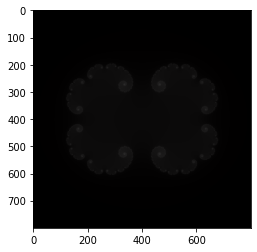

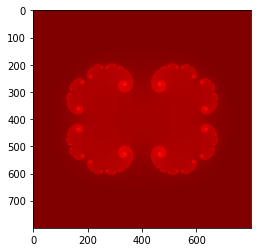

'\nCOLORMAP_JET: dark blue to dark red, passing through shades of purple, blue, green, yellow, and orange.\nCOLORMAP_HOT: black to white, passing through shades of red, orange, and yellow.\nCOLORMAP_BONE: black to white, passing through shades of gray, blue, and purple.\nCOLORMAP_PINK: light pink to dark pink.\nCOLORMAP_RAINBOW: blue to red, passing through shades of purple, blue, green, yellow, orange, and red.\n'

In [42]:
from itertools import product
import matplotlib.pyplot as plt
from multiprocessing import Pool
import numpy as np
import cv2

# Define the seed value for the Julia set (0.6180, -0.314)
seed_value = complex(0.3141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233785303861, 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000072973525628)
max_iterations = 99

# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i, int(i*255/256), int(i*255/256), int(i*255/256)
    return max_iterations,0, 0, 0

# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
    for x, y in product(range(x, x+800), range(y, y+800)):
        c = complex(x/256, y/256)
        julia_set[x+400, y+400] = escape_time(c)
    return julia_set

# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
    julia_set = np.c_[tuple(p.imap_unordered(generate_julia, ((x, y) for x in range(-400, 400, 800) for y in range(-400, 400, 800)), chunksize=1))]



# Remove the alpha channel of the image
julia_set = julia_set[:,:,:3]

# Apply jet colormap to the Julia set
jet_map = cv2.applyColorMap(julia_set, cv2.COLORMAP_JET)


#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)
cv2.imwrite("julia_set_jet.png", jet_map)

#Show the original image
plt.imshow(julia_set)
plt.show()

#Show the jet colormapped image
plt.imshow(jet_map)
plt.show()
"""
COLORMAP_JET: dark blue to dark red, passing through shades of purple, blue, green, yellow, and orange.
COLORMAP_HOT: black to white, passing through shades of red, orange, and yellow.
COLORMAP_BONE: black to white, passing through shades of gray, blue, and purple.
COLORMAP_PINK: light pink to dark pink.
COLORMAP_RAINBOW: blue to red, passing through shades of purple, blue, green, yellow, orange, and red.
"""

Generating Julia Set...
Saving image to myimage.png


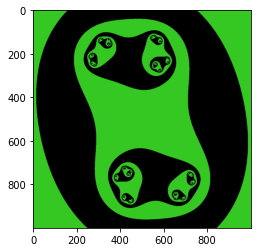

In [199]:
from juliart.main import JuliaSet

juliaset = JuliaSet(
    resolution=1000, # (1000x1000)
    color="pattern", # random, glow, pattern
    theme="random",
    rgb=None,  # "197,18,12"
    iterations=200,
)
juliaset.generate_image(zoom=1.8)
juliaset.save_image("myimage.png")
import matplotlib.pyplot as plt
# read the image
img = cv2.imread("myimage.png")
# show the image
plt.imshow(img)
plt.show()


In [16]:
!pip install cython
import cython
from math import sin



In [18]:
!pip show cython

Name: Cython
Version: 0.29.28
Summary: The Cython compiler for writing C extensions for the Python language.
Home-page: http://cython.org/
Author: Robert Bradshaw, Stefan Behnel, Dag Seljebotn, Greg Ewing, et al.
Author-email: cython-devel@python.org
License: Apache
Location: /opt/conda/lib/python3.8/site-packages
Requires: 
Required-by: mthree


In [20]:
%%cython -a

Traceback (most recent call last):
  Input In [20] in <cell line: 1>
    get_ipython().run_cell_magic('cython', '-a', '')
  File /opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2325 in run_cell_magic
    raise UsageError(etpl.format(magic_name, extra))
UsageError: Cell magic `%%cython` not found.

Use %tb to get the full traceback.


In [23]:

from itertools import product
import matplotlib.pyplot as plt
from multiprocessing import Pool
import numpy as np
import cv2

# Define the seed value for the Julia set (0.6180, -0.314)
seed_value = complex( 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001618033988749894)
max_iterations = 256

# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i, int(i*255/256), int(i*255/256), int(i*255/256)
    return max_iterations,0, 0, 0

# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
    for x, y in product(range(x, x+800), range(y, y+800)):
        c = complex(x/256, y/256)
        julia_set[x+400, y+400] = escape_time(c)
    return julia_set

# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y) 
        for x in range(-400, 400, 800) for y in range(-400, 400, 800)), chunksize=1))

# Remove the alpha channel of the image
julia_set = julia_set[:,:,:3]

# Apply jet colormap to the Julia set
jet_map = cv2.applyColorMap(julia_set, cv2.COLORMAP_JET)


#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)
cv2.imwrite("julia_set_jet.png", jet_map)

#Show the original image
plt.imshow(julia_set)
plt.show()

#Show the jet colormapped image
plt.imshow(jet_map)
plt.show()



/tmp/ipykernel_116/3633196086.py:32: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)
Process ForkPoolWorker-13:
Process ForkPoolWorker-12:
Process ForkPoolWorker-10:
Process ForkPoolWorker-16:
Process ForkPoolWorker-9:
Process ForkPoolWorker-11:
Process ForkPoolWorker-15:
Traceback (most recent call last):
Process ForkPoolWorker-14:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/multiprocessing/process.